<a href="https://colab.research.google.com/github/francji1/01RAD/blob/main/code/01RAD_ex01_python_solution_by_Prusek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01RAD Exercise 01
 - Introduction into Linear regression
 - Least squares estimation

## Read and setup dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the data from the URL
url_fsdata = 'https://raw.githubusercontent.com/francji1/01RAD/main/data/fsdata.csv'
fsdata = pd.read_csv(url_fsdata, sep=',')

In [ ]:
# Suppress FutureWarnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [ ]:
fsdata

,Unnamed: 0,father,son
0,1,65.04851,59.77827
1,2,63.25094,63.21404
2,3,64.95532,63.34242
3,4,65.75250,62.79238
4,5,61.13723,64.28113
...,...,...,...
1073,1074,66.99681,70.75232
1074,1075,71.33181,68.26774
1075,1076,71.78314,69.30589
1076,1077,70.73837,69.30199


### Explore the dataset

In [ ]:
first_rows = fsdata.head()
data_types = fsdata.dtypes
summary = fsdata.describe()
dimension = fsdata.shape
na_occurrence = fsdata.isna().sum()
print(first_rows)
print(data_types)
print(summary)
print(dimension)
print(na_occurrence)

   Unnamed: 0    father       son
0           1  65.04851  59.77827
1           2  63.25094  63.21404
2           3  64.95532  63.34242
3           4  65.75250  62.79238
4           5  61.13723  64.28113
Unnamed: 0      int64
father        float64
son           float64
dtype: object
        Unnamed: 0       father          son
count  1078.000000  1078.000000  1078.000000
mean    539.500000    67.687097    68.684070
std     311.336099     2.744868     2.814702
min       1.000000    59.008000    58.507080
25%     270.250000    65.787735    66.931232
50%     539.500000    67.766600    68.615820
75%     808.750000    69.602980    70.465970
max    1078.000000    75.433930    78.364790
(1078, 3)
Unnamed: 0    0
father        0
son           0
dtype: int64


In [ ]:
fsdata

,Unnamed: 0,father,son
0,1,65.04851,59.77827
1,2,63.25094,63.21404
2,3,64.95532,63.34242
3,4,65.75250,62.79238
4,5,61.13723,64.28113
...,...,...,...
1073,1074,66.99681,70.75232
1074,1075,71.33181,68.26774
1075,1076,71.78314,69.30589
1076,1077,70.73837,69.30199


## 2. Data visualization

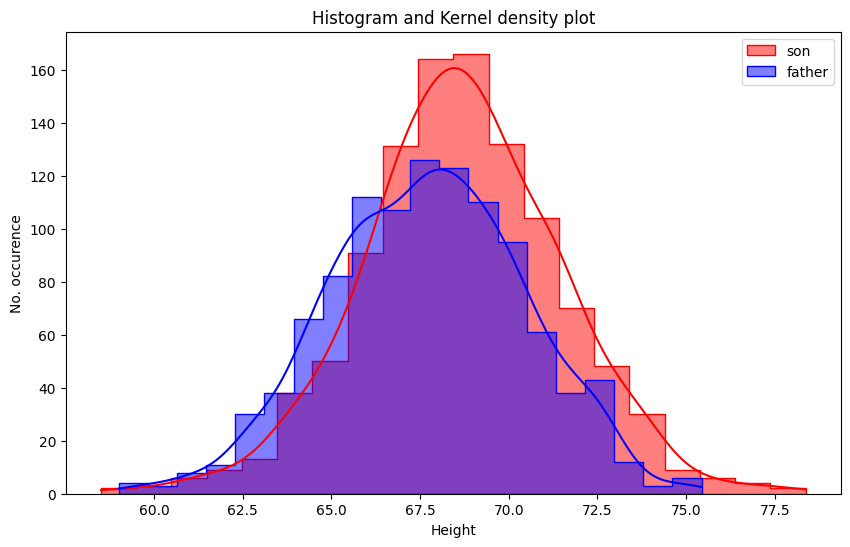

In [ ]:
# Setting color palette
color_6 = sns.color_palette("hsv", 6)
color_1 = sns.color_palette("hsv", 1)

# Plotting the combined histogram for both 'son' and 'father'
plt.figure(figsize=(10, 6))
sns.histplot(fsdata, x="son", kde=True, color="red", label="son", bins=20, element='step')
sns.histplot(fsdata, x="father", kde=True, color="blue", label="father", bins=20, element='step')
plt.title("Histogram and Kernel density plot")
plt.xlabel("Height")
plt.ylabel("No. occurence")
plt.legend()
plt.show()


### Reshape and further visualization

In [ ]:
# Reshaping the dataset to longer format
fsdata_long = fsdata.reset_index().melt(id_vars=['index'], value_vars=['father', 'son'],
                                        var_name='relation', value_name='height')
fsdata_long = fsdata_long.rename(columns={'index': 'family'})
fsdata_long

,family,relation,height
0,0,father,65.04851
1,1,father,63.25094
2,2,father,64.95532
3,3,father,65.75250
4,4,father,61.13723
...,...,...,...
2151,1073,son,70.75232
2152,1074,son,68.26774
2153,1075,son,69.30589
2154,1076,son,69.30199


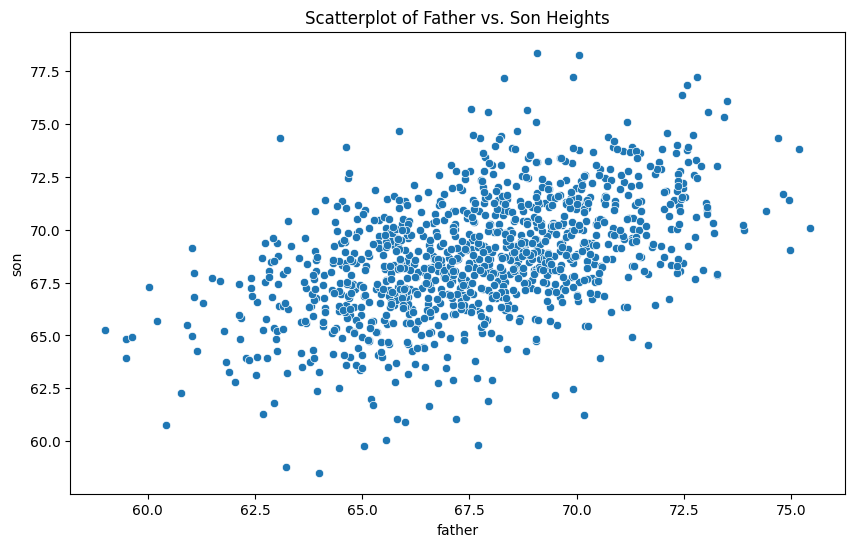

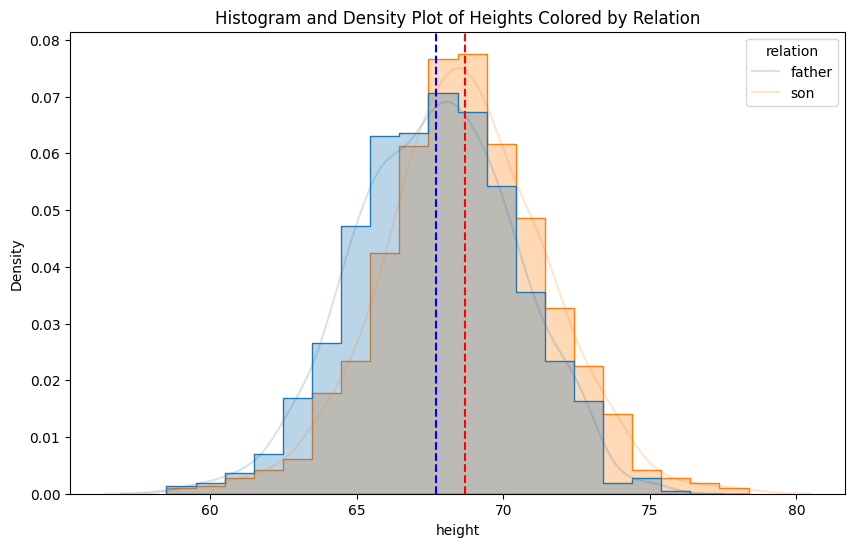

In [ ]:
# Scatterplot of father vs. son
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fsdata, x='father', y='son')
plt.title("Scatterplot of Father vs. Son Heights")
plt.show()

# Histogram of heights with density plots colored by relation
plt.figure(figsize=(10, 6))
sns.histplot(fsdata_long, x='height', hue='relation', bins=20, element='step', alpha=0.3, stat="density")
sns.kdeplot(data=fsdata_long, x='height', hue='relation', alpha=0.2)
plt.axvline(x=fsdata_long[fsdata_long['relation'] == 'father']['height'].mean(), color='blue', linestyle='--')
plt.axvline(x=fsdata_long[fsdata_long['relation'] == 'son']['height'].mean(), color='red', linestyle='--')
plt.title("Histogram and Density Plot of Heights Colored by Relation")
plt.show()



The sns.histplot function from the Seaborn library, when using the kde=True argument, estimates the Kernel Density Estimation (KDE) of the data. By default, Seaborn uses the Gaussian (also known as the "normal") kernel for KDE. Thus, the plot you mentioned utilizes the Gaussian kernel for estimating the density.

## What is p-value?

Discuss what p-value is and what is not.

### Hypothesis testing: Var test

In [ ]:
from scipy.stats import f

def f_test_variances(column1, column2):
    # Calculate variances
    var1 = column1.var()
    var2 = column2.var()

    # Calculate F-statistic
    f_stat = var1 / var2 if var1 > var2 else var2 / var1

    # Degrees of freedom
    df1 = len(column1) - 1
    df2 = len(column2) - 1

    p_value = f.cdf(f_stat, df1, df2)
    two_sided_p_val = 2 * min(p_value, 1 - p_value)

    return f_stat, two_sided_p_val

f_stat, p_value = f_test_variances(fsdata['father'], fsdata['son'])
print(f"F-test statistic: {f_stat}, two-sided p-value: {p_value}")

F-test statistic: 1.0515299786858934, two-sided p-value: 0.4097989207603212


In [ ]:
from scipy.stats import levene

# Levene’s test for equal variances
stat, p_val = levene(fsdata['father'], fsdata['son'])

print(f"Levene’s test statistic: {stat}, p-value: {p_val}")


Levene’s test statistic: 0.10669861187871861, p-value: 0.7439662220514667


In [ ]:
from scipy.stats import bartlett

# Bartlett’s test for equal variances (assume normality)
stat, p_val = bartlett(fsdata['father'], fsdata['son'])

print(f"Bartlett’s test statistic: {stat}, p-value: {p_val}")


Bartlett’s test statistic: 0.6793840607660858, p-value: 0.4097989012720561


### Hypothesis testing: t-tests

In [ ]:
from scipy.stats import ttest_ind, ttest_rel

# Paired t-test (correct for paired father-son data)
t_stat_paired, p_val_paired = ttest_rel(fsdata['father'], fsdata['son'])

# One-sided paired t-test: Are sons taller than fathers?
t_stat_onesided, p_val_onesided = ttest_rel(fsdata['father'], fsdata['son'])

# Adjust the p-value for one-sided test
if t_stat_onesided > 0:
    p_val_onesided = p_val_onesided / 2  # Sons are taller
else:
    p_val_onesided = 1 - p_val_onesided / 2  # Sons are not taller

# Print results
print(f"Paired t-test: t-statistic = {t_stat_paired}, p-value = {p_val_paired}")
print(f"One-sided t-test (Sons > Fathers): t-statistic = {t_stat_onesided}, one-sided p-value = {p_val_onesided}")


Paired t-test: t-statistic = -11.788549038237012, p-value = 2.957226369228171e-30
One-sided t-test (Sons > Fathers): t-statistic = -11.788549038237012, one-sided p-value = 1.0


In [ ]:
# Unpaired t-test (assuming equal variance) Can we use it?
t_stat_unpaired, p_val_unpaired = ttest_ind(fsdata['father'], fsdata['son'], equal_var=True)


In [ ]:
# Create a DataFrame to display the results
results = pd.DataFrame({
    'Test Type': ['Unpaired T-test', 'Paired T-test', 'One-sided T-test (Sons > Fathers)'],
    'T-statistic': [t_stat_unpaired, t_stat_paired, t_stat_onesided],
    'P-value': [p_val_unpaired, p_val_paired, p_val_onesided]
})
# Print the formatted table
print(results)

                           Test Type  T-statistic       P-value
0                    Unpaired T-test    -8.325920  1.467508e-16
1                      Paired T-test   -11.788549  2.957226e-30
2  One-sided T-test (Sons > Fathers)   -11.788549  1.000000e+00


### Scatter plots and regression lines

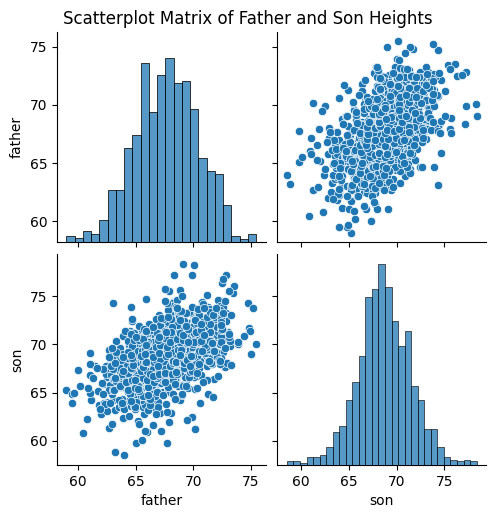

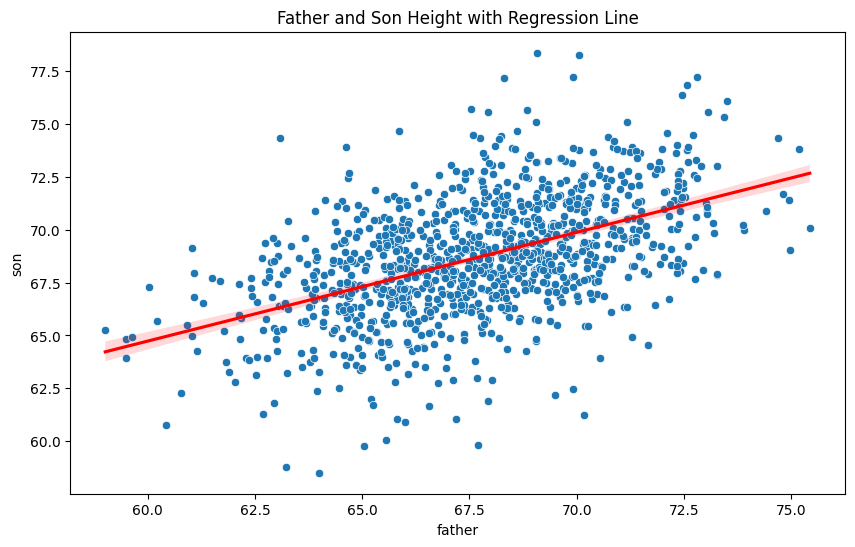

In [ ]:
# Scatter plot matrix
sns.pairplot(fsdata[['father', 'son']])
plt.suptitle("Scatterplot Matrix of Father and Son Heights", y=1.02)
plt.show()

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fsdata, x='father', y='son')
sns.regplot(data=fsdata, x='father', y='son', scatter=False, color='red')
plt.title("Father and Son Height with Regression Line")
plt.show()


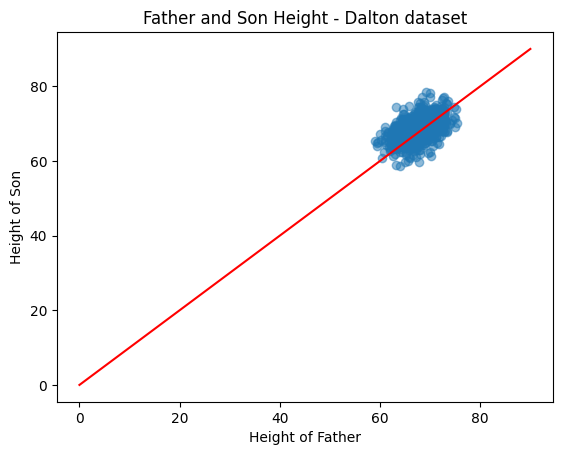

In [ ]:
# Scatter plot of son vs. father heights
plt.scatter(fsdata['father'], fsdata['son'], alpha=0.5)
plt.title("Father and Son Height - Dalton dataset")
plt.xlabel("Height of Father")
plt.ylabel("Height of Son")
plt.plot([0, 90], [0, 90], color='red')  # Line with slope 1 and intercept 0
plt.show()


### 2. Analyzing the data 'manually'

In [ ]:
# Calculation from the lecture

x =  fsdata['father'].values
y =  fsdata['son'].values

# Calculation of the means of x and y
x_mean = np.mean(x)
y_mean = np.mean(y)


# Estimate for beta1 (slope)
beta1_hat = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)

# Estimate for beta0 (intercept)
beta0_hat = y_mean - beta1_hat * x_mean

# Predicted values
y_hat = beta0_hat + beta1_hat * x

# Estimate for sigma^2 (variance of errors) from MLE
sigma2_hat = np.sum((y - y_hat) ** 2) / len(y)

# Unbiased Estimate for sigma^2
sigma2_hat_u = np.sum((y - y_hat) ** 2) / (len(y) - 2 )


# Results
print(f"Estimate for beta1 (slope): {beta1_hat}")
print(f"Estimate for beta0 (intercept): {beta0_hat}")
print(f"Estimate for sigma^2 (variance of errors): {sigma2_hat}")
print(f"Unbiased Estimate for sigma^2 (variance of errors): {sigma2_hat_u}")


Estimate for beta1 (slope): 0.5140930386233075
Estimate for beta0 (intercept): 33.886604354077924
Estimate for sigma^2 (variance of errors): 5.925789646773292
Unbiased Estimate for sigma^2 (variance of errors): 5.93680412567064


In [ ]:
fsdata['son'].corr(fsdata['father'])

0.5013383111723433

**Task**: rewrite previous derivation of $\hat{\beta_1}$ with
* Covariance and Variance formula
* Correlation and Sample standard deviation formula


In [ ]:
# Mean and standard deviation calculations
s_mean = fsdata['son'].mean()
f_mean = fsdata['father'].mean()
s_sd = fsdata['son'].std()
f_sd = fsdata['father'].std()


#Varaince calculation
b1_hat = fsdata.cov().loc['father', 'son'] / f_sd**2

# Correlation calculation
fs_cor = fsdata['son'].corr(fsdata['father'])
# Slope of the regression line
b1_hat = (fs_cor * s_sd) / f_sd

b1_hat = fsdata.cov().loc['father', 'son'] / f_sd**2

# Intercept of the regression line
b0_hat = s_mean - b1_hat * f_mean
print(b0_hat)
print(b1_hat)

33.886604354077924
0.5140930386233075


### 3. Computing residuals and other statistics

In [ ]:
n = len(fsdata)
X = fsdata['father'].values
Y = fsdata['son'].values
IX = np.column_stack([np.ones(n), X])

# Compute residuals
res = Y - np.dot(IX, np.array([b0_hat, b1_hat]))
res

array([-7.54932052, -3.18943229, -3.93726219, ..., -1.48392692,
       -0.95071793, -3.0154758 ])

In [ ]:
# Estimate variance of disturbances
p = 1
sigma = np.sqrt(sum(res**2) / (n - 1 - p))

# Variance of parameters
S_xx = sum((X - f_mean)**2)
var_b1_hat = sigma**2 / S_xx
sd_b1_hat = np.sqrt(var_b1_hat)

var_b0_hat = sigma**2 * (sum(X**2) / (n * S_xx))
sd_b0_hat = np.sqrt(var_b0_hat)


### 4. OLS estimation

For this, we can use the `numpy.linalg` module to solve the matrix equations:

In [ ]:
from numpy.linalg import solve

# Reshape X to make it a 2D array
X_2D = X.reshape(-1, 1)

# Without intercept
beta_hat_wo = solve(X_2D.T @ X_2D, X_2D.T @ Y)
print(beta_hat_wo)
# With intercept
beta_hat_w = solve(IX.T @ IX, IX.T @ Y)
print(beta_hat_w)


[1.01390796]
[33.88660435  0.51409304]


## Model without and with intercept using Python's statsmodels


In [ ]:
# Defining the variables

import statsmodels.api as sm
Y = fsdata['son'].values
X_wo_intercept = fsdata['father'].values.reshape(-1, 1)


# Model without intercept
X_wo_intercept = fsdata['father'].values.reshape(-1, 1)
model0 = sm.OLS(Y, X_wo_intercept).fit()
print(model0.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          6.506e+05
Date:                Wed, 09 Oct 2024   Prob (F-statistic):                        0.00
Time:                        08:57:29   Log-Likelihood:                         -2637.4
No. Observations:                1078   AIC:                                      5277.
Df Residuals:                    1077   BIC:                                      5282.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
import statsmodels.formula.api as smf

# Defining the formula for the model using R-style notation
formula = 'son ~ -1 + father'

# Fitting the model without an intercept
model_without_intercept = smf.ols(formula=formula, data=fsdata).fit()

# Print the summary of the model
print(model_without_intercept.summary())

                                 OLS Regression Results                                
Dep. Variable:                    son   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          6.506e+05
Date:                Wed, 09 Oct 2024   Prob (F-statistic):                        0.00
Time:                        08:57:29   Log-Likelihood:                         -2637.4
No. Observations:                1078   AIC:                                      5277.
Df Residuals:                    1077   BIC:                                      5282.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# Add a constant (intercept) to the model
X_with_intercept = sm.add_constant(fsdata['father'].values)

# Fit the OLS model
model1 = sm.OLS(Y, X_with_intercept).fit()

# Print the summary of the model
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     361.2
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           1.12e-69
Time:                        08:57:29   Log-Likelihood:                -2488.7
No. Observations:                1078   AIC:                             4981.
Df Residuals:                    1076   BIC:                             4991.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.8866      1.832     18.493      0.0

In [ ]:
# Formula with intercept
formula_with_intercept = 'son ~ father'

# Fitting the model with intercept
model_with_intercept = smf.ols(formula=formula_with_intercept, data=fsdata).fit()

# Print the summary of the model
print(model_with_intercept.summary())


                            OLS Regression Results                            
Dep. Variable:                    son   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     361.2
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           1.12e-69
Time:                        08:57:29   Log-Likelihood:                -2488.7
No. Observations:                1078   AIC:                             4981.
Df Residuals:                    1076   BIC:                             4991.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.8866      1.832     18.493      0.0

In [ ]:
# Extracting the coefficients from the models
beta_wo = model0.params[0]  # For the model without intercept
beta_w0, beta_w1 = model1.params  # For the model with intercept

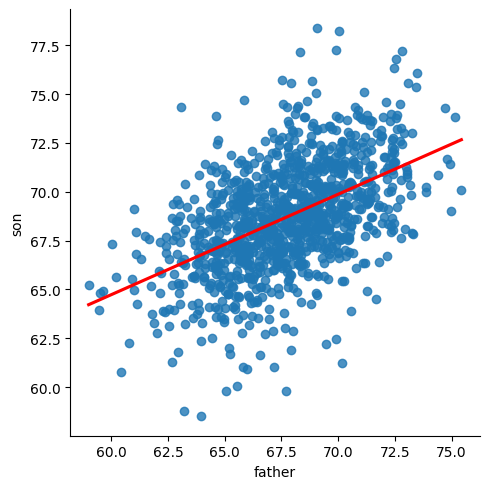

In [ ]:
# Plot with regression line
sns.lmplot(data=fsdata, x='father', y='son', ci=None, line_kws={'color': 'red'})


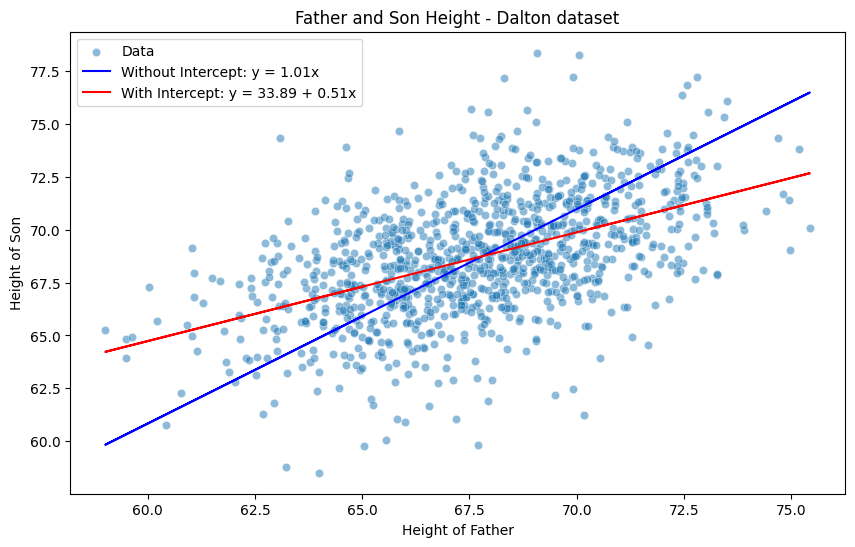

In [ ]:
# Plotting the data points along with the regression lines
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fsdata, x='father', y='son', label='Data', alpha=0.5)
plt.plot(fsdata['father'], fsdata['father'] * beta_wo, color='blue',
         label=f'Without Intercept: y = {beta_wo:.2f}x')
plt.plot(fsdata['father'], beta_w0 + fsdata['father'] * beta_w1, color='red',
         label=f'With Intercept: y = {beta_w0:.2f} + {beta_w1:.2f}x')
plt.title("Father and Son Height - Dalton dataset")
plt.xlabel("Height of Father")
plt.ylabel("Height of Son")
plt.legend()
plt.show()


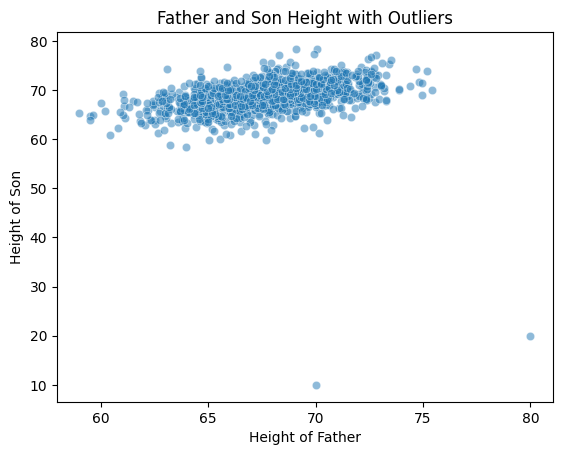

In [ ]:
# Regenerating the dataset with outliers
fsdata_outliers = fsdata.copy()

# Creating a DataFrame with outliers
outliers = pd.DataFrame({'father': [70, 80], 'son': [10, 20]})

# Concatenating the original data with the outliers
fsdata_outliers = pd.concat([fsdata_outliers, outliers], ignore_index=True)

# Displaying the scatter plot with outliers for only "father" and "son" columns
sns.scatterplot(data=fsdata_outliers, x='father', y='son', alpha=0.5)
plt.title("Father and Son Height with Outliers")
plt.xlabel("Height of Father")
plt.ylabel("Height of Son")
plt.show()



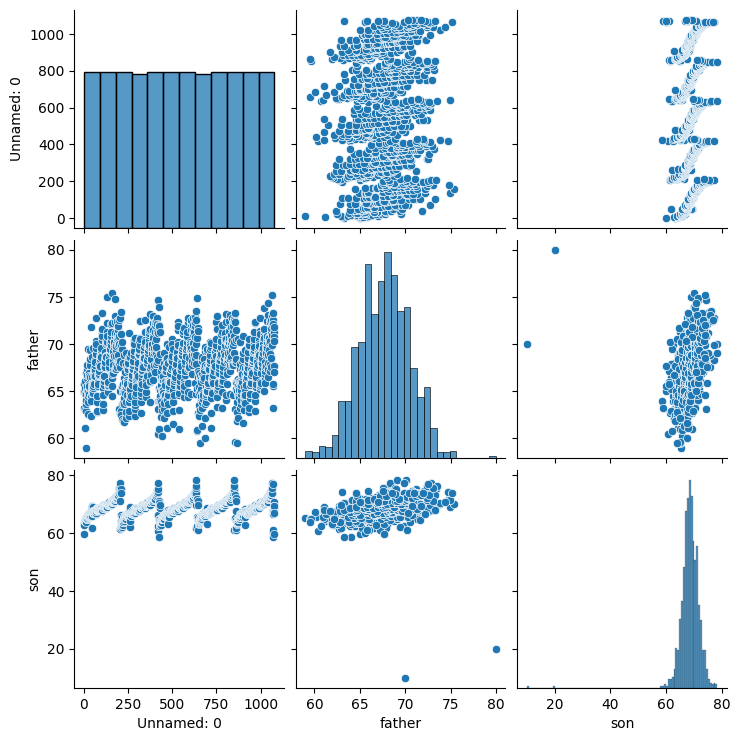

In [ ]:
# Displaying the scatter plot with outliers
sns.pairplot(fsdata_outliers)

In [ ]:


# Fitting the model for data with outliers
model_3 = smf.ols(formula='son ~ -1  + father', data=fsdata_outliers).fit()
model_4 = smf.ols(formula='son ~ father', data=fsdata_outliers).fit()

beta_wo_out = model_3.params[0]  # For the model without intercept
beta_w0_out, beta_w1_out = model_4.params  # For the model with intercept

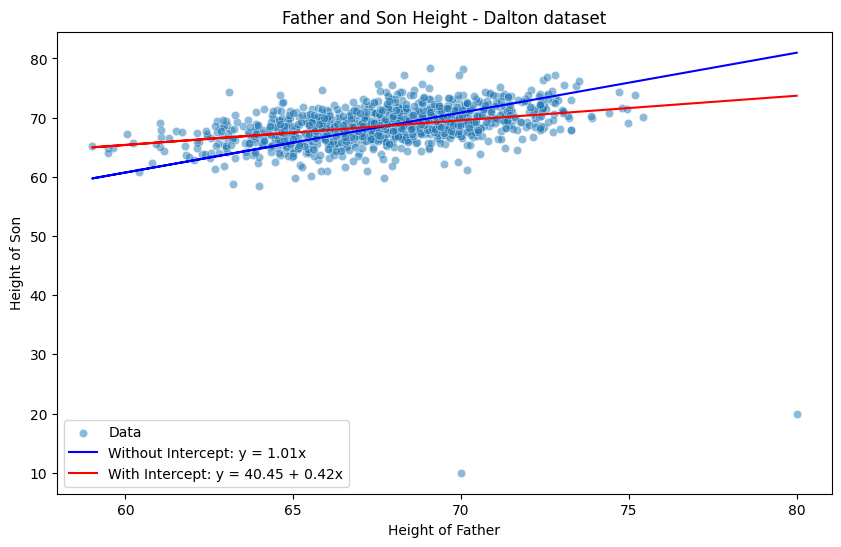

In [ ]:
# Plotting the data points along with the regression lines
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fsdata_outliers, x='father', y='son', label='Data', alpha=0.5)
plt.plot(fsdata_outliers['father'], fsdata_outliers['father'] * beta_wo_out, color='blue',
         label=f'Without Intercept: y = {beta_wo_out:.2f}x')
plt.plot(fsdata_outliers['father'], beta_w0_out + fsdata_outliers['father'] * beta_w1_out, color='red',
         label=f'With Intercept: y = {beta_w0_out:.2f} + {beta_w1_out:.2f}x')
plt.title("Father and Son Height - Dalton dataset")
plt.xlabel("Height of Father")
plt.ylabel("Height of Son")
plt.legend()
plt.show()

Coefficients:
 [33.88660435  0.51409304]

Residuals:
 [-7.54932052 -3.18943229 -3.93726219 ... -1.48392692 -0.95071793
 -3.0154758 ]

Fitted Values:
 [67.32759052 66.40347229 67.27968219 ... 70.78981692 70.25270793
 70.0304758 ]


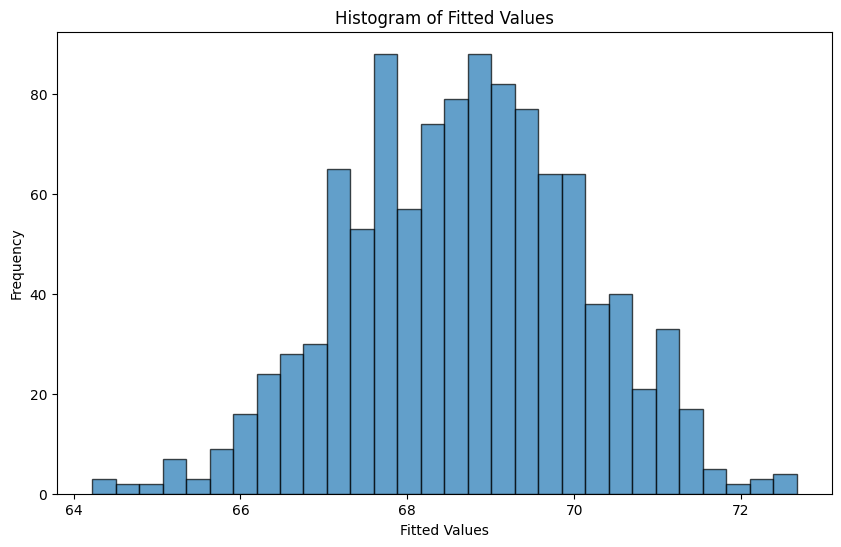


Sigma Hat (Standard Error of the Regression):
 2.436555791618702


In [ ]:
# Coefficients of the model
coefficients = model1.params
print("Coefficients:\n", coefficients)

# Residuals of the model
residuals = model1.resid
print("\nResiduals:\n", residuals)

# Fitted values (predictions based on the model)
fitted_values = model1.fittedvalues
print("\nFitted Values:\n", fitted_values)

# Histogram of the fitted values
plt.figure(figsize=(10, 6))
plt.hist(fitted_values, bins=30, edgecolor="k", alpha=0.7)
plt.title("Histogram of Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Frequency")
plt.show()

# For sigmaHat (standard error of the regression), in R it's typically derived from the residuals.
# In Python with statsmodels:
sigma_hat = np.sqrt(model1.scale)
print("\nSigma Hat (Standard Error of the Regression):\n", sigma_hat)


* Residuals vs Fitted values: To detect non-linearity, unequal error variances, and outliers.
* Normal Q-Q plot: To check the normality of the residuals.
* Scale-Location plot: To check the homogeneity of variance of the residuals.
* Residuals vs Leverage: To identify influential cases.

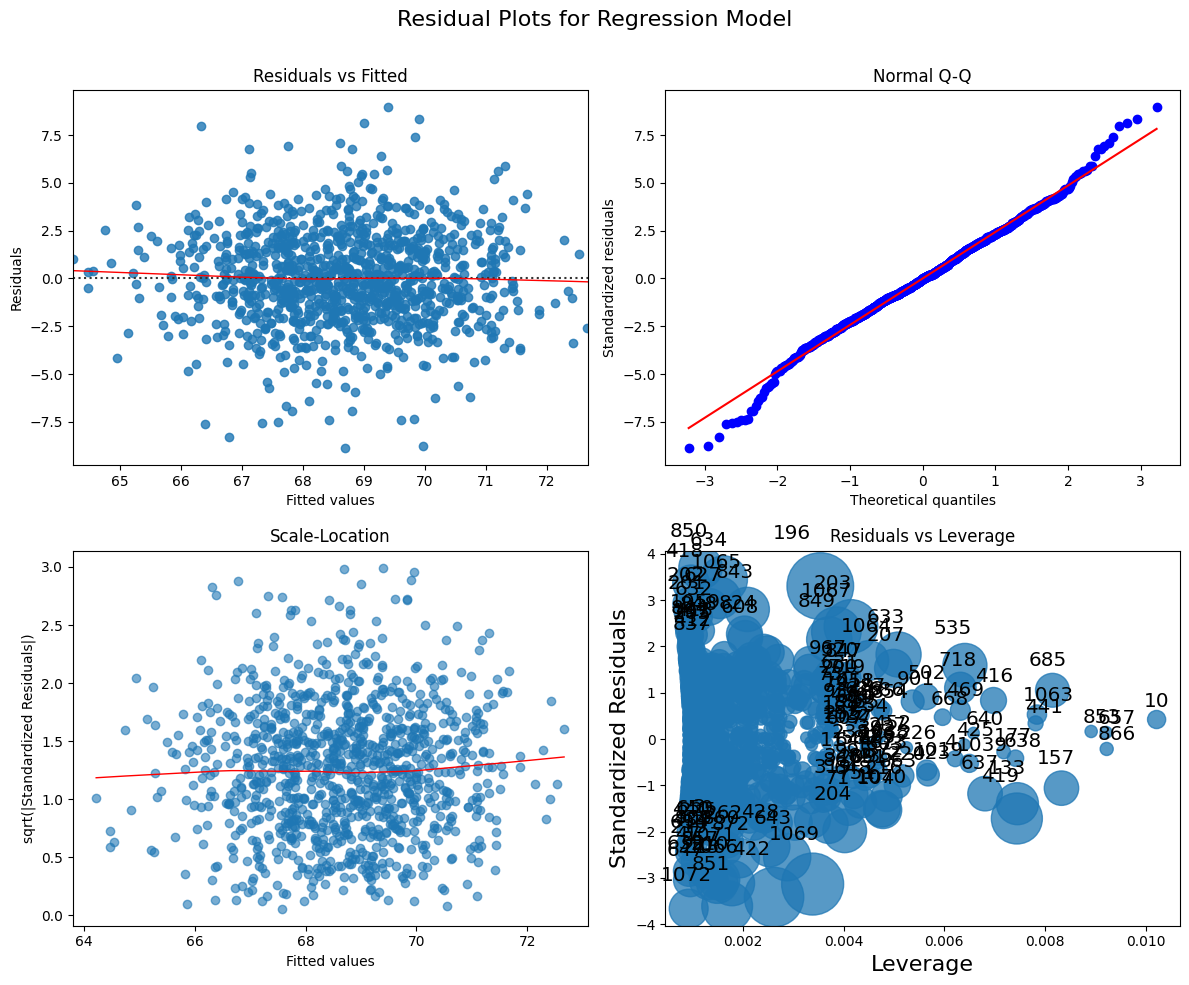

In [ ]:
import scipy.stats as stats
from statsmodels.graphics.regressionplots import influence_plot

# Setting up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Residual Plots for Regression Model', fontsize=16)

# 1. Residuals vs Fitted values
sns.residplot(x=model1.fittedvalues, y=model1.resid, lowess=True, ax=axs[0, 0], line_kws={'color': 'red', 'lw': 1})
axs[0, 0].set_title('Residuals vs Fitted')
axs[0, 0].set_xlabel('Fitted values')
axs[0, 0].set_ylabel('Residuals')

# 2. Normal Q-Q plot
stats.probplot(model1.resid, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title('Normal Q-Q')
axs[0, 1].set_ylabel('Standardized residuals')

# 3. Scale-Location plot
axs[1, 0].scatter(model1.fittedvalues, np.sqrt(np.abs(model1.resid)), alpha=0.6)
sns.regplot(x=model1.fittedvalues, y=np.sqrt(np.abs(model1.resid)), scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1}, ax=axs[1, 0])
axs[1, 0].set_title('Scale-Location')
axs[1, 0].set_xlabel('Fitted values')
axs[1, 0].set_ylabel('sqrt(|Standardized Residuals|)')

# 4. Residuals vs Leverage
influence_plot(model1, ax=axs[1, 1], criterion="cooks")
axs[1, 1].set_title('Residuals vs Leverage')
axs[1, 1].set_xlabel('Leverage')
axs[1, 1].set_ylabel('Standardized Residuals')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


### 5. Coefficient of determination (R-squared)

Will be covered in detail during the next exercise.

In [ ]:
SS_tot = sum((Y - Y.mean())**2)
SS_reg = sum((np.dot(IX, np.array([b0_hat, b1_hat])) - s_mean)**2)
SS_res = sum(res**2)
R2 = 1 - SS_res/SS_tot
R2

0.2513401022491365

In [ ]:
# Calculate total, regression, and residual sums of squares
SS_tot = np.sum((Y - Y.mean())**2)
SS_reg = np.sum((np.dot(IX, beta_hat_w) - Y.mean())**2)
SS_res = np.sum(res**2)

# Check if SS_tot equals SS_reg + SS_res
print(SS_tot == (SS_reg + SS_res))

# Calculate R-squared using different formulas
R2_1 = 1 - SS_res/SS_tot
R2_2 = SS_reg/SS_tot
R2_3 = (SS_tot - SS_res)/SS_tot
print(R2_1, R2_2, R2_3)

False
0.25134010224913705 0.2513401022498157 0.25134010224913705



# Exercise - Homework 01

## Investigate a relationship between speed and stopping distance for cars

### Questions:
 1) Display data set (scatter plot, histograms and density plots of speed and dist variables)

 2) Try model with and without intercept

 3) Compute "manually" OLS estimate of regression parameters and error variance

 4) Compute "manually" variance of estimated parameters

 5) Plot data with both estimated regression lines

 6) Investigate output from both models. If the slope changes between these two models, why do you think that happens?

 7) What is the estimated stopping distance for a car going 20mph? (use both models) compare with the estimated stopping distance for a car going 30mph? (use both models, can we predict this?)

 8) For both models (with and without intercept), calculate the residuals manually. Plot the residuals for both models. Which model seems to fit the data better?

 9) Introduce an artificial outlier (e.g., a very high stopping distance for a low speed, or vice versa) into the dataset. Refit the models and visualize how the outlier affects the slope and intercept of the regression lines. Does it change both models significantly?

 10) Is the simple linear model good approximation for these problems? Suggest next steps.

In [ ]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Načtení datasetu 'cars' z balíčku 'datasets' pomocí statsmodels
dataset_cars = sm.datasets.get_rdataset('cars', package='datasets')
cars_df = dataset_cars.data

# Zobrazení prvních několika řádků datasetu
print(cars_df.head())

# Zobrazení názvů sloupců pro kontrolu
print("Sloupce v datasetu:", cars_df.columns.tolist())


   speed  dist
0      4     2
1      4    10
2      7     4
3      7    22
4      8    16
Sloupce v datasetu: ['speed', 'dist']


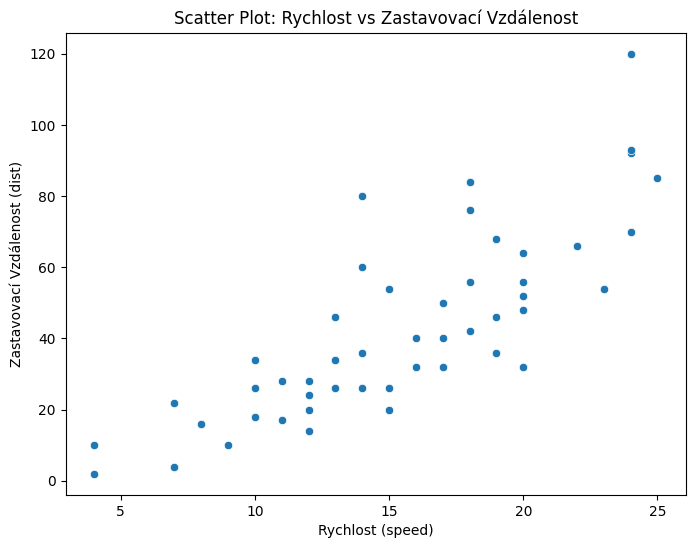

In [ ]:
# Nastavení velikosti grafu
plt.figure(figsize=(8, 6))

# Vytvoření scatter plotu pomocí seaborn
sns.scatterplot(data=cars_df, x='speed', y='dist')

# Přidání titulku a popisků os
plt.title('Scatter Plot: Rychlost vs Zastavovací Vzdálenost')
plt.xlabel('Rychlost (speed)')
plt.ylabel('Zastavovací Vzdálenost (dist)')

# Zobrazení grafu
plt.show()


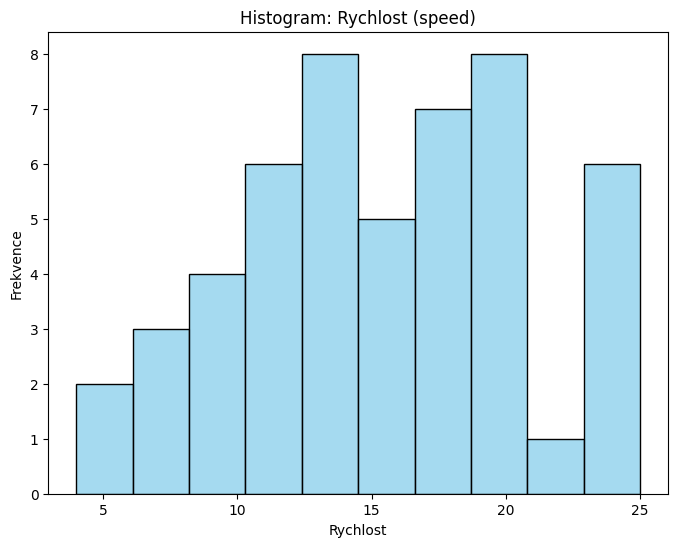

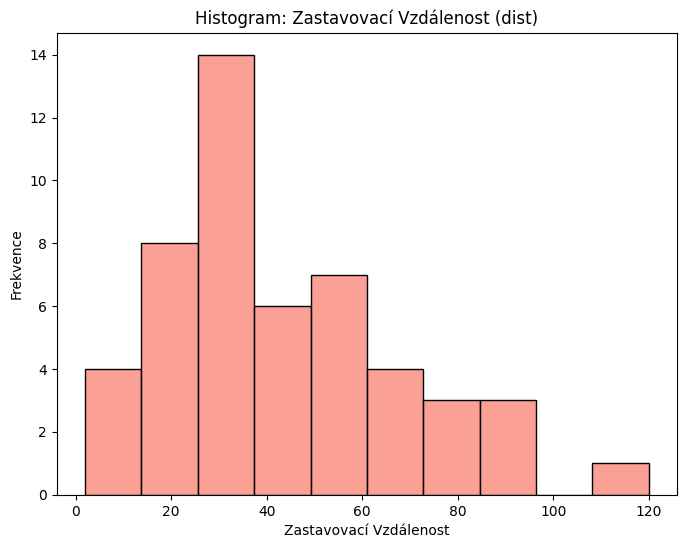

In [ ]:
# Histogram pro rychlost (speed)
plt.figure(figsize=(8, 6))
sns.histplot(cars_df['speed'], bins=10, kde=False, color='skyblue')
plt.title('Histogram: Rychlost (speed)')
plt.xlabel('Rychlost')
plt.ylabel('Frekvence')
plt.show()

# Histogram pro zastavovací vzdálenost (dist)
plt.figure(figsize=(8, 6))
sns.histplot(cars_df['dist'], bins=10, kde=False, color='salmon')
plt.title('Histogram: Zastavovací Vzdálenost (dist)')
plt.xlabel('Zastavovací Vzdálenost')
plt.ylabel('Frekvence')
plt.show()



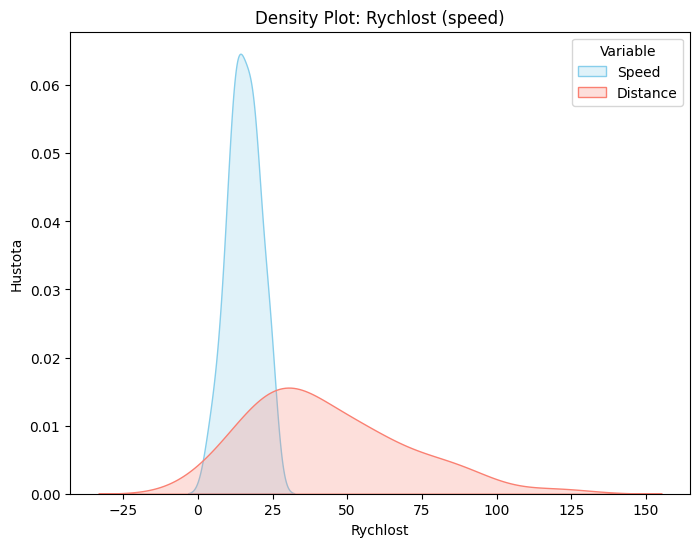

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(cars_df['speed'], shade=True, color='skyblue', label='Speed')
sns.kdeplot(cars_df['dist'], shade=True, color='salmon', label='Distance')
plt.title('Density Plot')
plt.xlabel('Rychlost')
plt.ylabel('Hustota')
plt.legend(title='Variable')
plt.show()



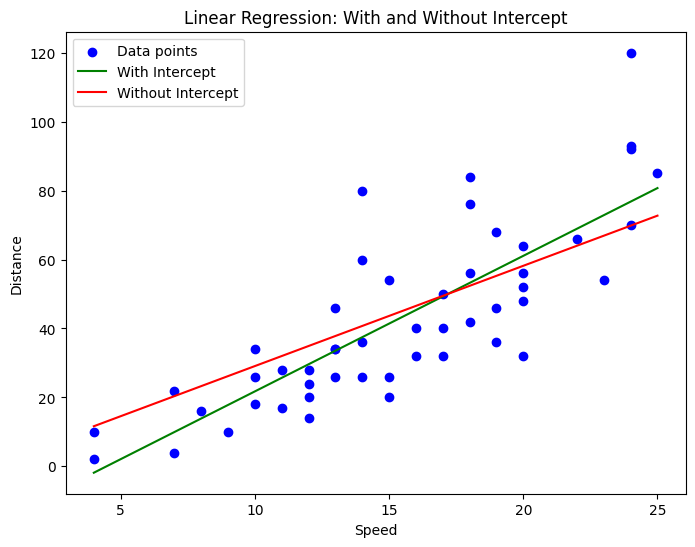

With intercept:
                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           1.49e-12
Time:                        08:58:13   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.5791      6.758    

In [ ]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Data
X = cars_df['speed']
y = cars_df['dist']

# Přidání interceptu (konstanty) pro model s interceptem
X_with_intercept = sm.add_constant(X)

# Lineární regrese s interceptem
model_with_intercept = sm.OLS(y, X_with_intercept).fit()
y_pred_with_intercept = model_with_intercept.predict(X_with_intercept)

# Lineární regrese bez interceptu
model_without_intercept = sm.OLS(y, X).fit()
y_pred_without_intercept = model_without_intercept.predict(X)

# Plotování
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')

# Regresní čáry
plt.plot(X, y_pred_with_intercept, color='green', label='With Intercept')
plt.plot(X, y_pred_without_intercept, color='red', label='Without Intercept')

# Popisky grafu
plt.title('Linear Regression: With and Without Intercept')
plt.xlabel('Speed')
plt.ylabel('Distance')
plt.legend()
plt.show()

# Výsledky regrese
print("With intercept:")
print(model_with_intercept.summary())
print("\nWithout intercept:")
print(model_without_intercept.summary())



In [ ]:
x =  cars_df['speed'].values
y =  cars_df['dist'].values

# Calculation of the means of x and y
x_mean = np.mean(x)
y_mean = np.mean(y)


# Estimate for beta1 (slope)
beta1_hat = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)

# Estimate for beta0 (intercept)
beta0_hat = y_mean - beta1_hat * x_mean

# Predicted values
y_hat = beta0_hat + beta1_hat * x

# Unbiased Estimate for sigma^2
sigma2_hat = np.sum((y - y_hat) ** 2) / (len(y) - 2 )

# Variance of beta1
var_beta1 = sigma2_hat / np.sum((x - x_mean) ** 2)

# Variance of beta0
var_beta0 = sigma2_hat * (1/len(x) + (x_mean ** 2) / np.sum((x - x_mean) ** 2))



# Results
print("Model WITH intercept:")
print(f"Estimate for beta1 (slope): {beta1_hat}")
print(f"Estimate for beta0 (intercept): {beta0_hat}")
print(f"Estimate for sigma^2 (variance of errors): {sigma2_hat}")
print(f"Variance of beta1: {var_beta1}")
print(f"Variance of beta0: {var_beta0}")

# Odhad pro beta1 bez interceptu
beta1_hat_no_intercept = np.sum(x * y) / np.sum(x ** 2)

# Predikované hodnoty pro model bez interceptu
y_hat_no_intercept = beta1_hat_no_intercept * x

# Výpočet rozptynu odhadu beta1 bez interceptu
# Pro model bez interceptu je rozptyn:
var_beta1_no_intercept = sigma2_hat / np.sum(x ** 2)

print("-----------------------------------------------------")
print("Model WITHOUT intercept:")
print(f"Estimate for beta1 (slope): {beta1_hat_no_intercept}")
print(f"Variance of beta1: {var_beta1_no_intercept}")

Model WITH intercept:
Estimate for beta1 (slope): 3.932408759124088
Estimate for beta0 (intercept): -17.57909489051096
Estimate for sigma^2 (variance of errors): 236.53168856447692
Variance of beta1: 0.17265086756531162
Variance of beta0: 45.676513523078846
-----------------------------------------------------
Model WITHOUT intercept:
Estimate for beta1 (slope): 2.909132143937103
Variance of beta1: 0.017881137629609686


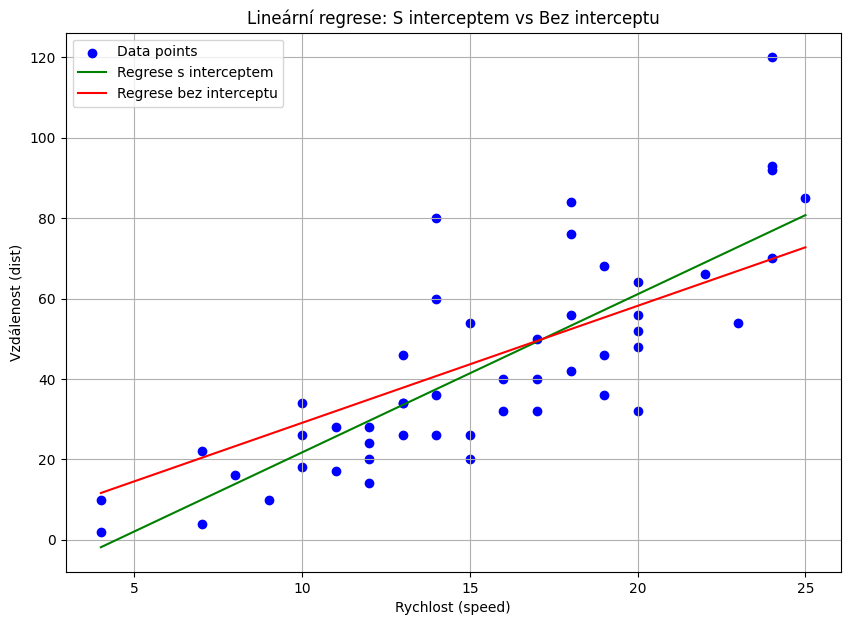

In [ ]:
# Vykreslení datových bodů
plt.figure(figsize=(10, 7))
plt.scatter(x, y, color='blue', label='Data points')

# Vykreslení regresní přímky s interceptem
plt.plot(x, y_hat, color='green', label='Regrese s interceptem')

# Vykreslení regresní přímky bez interceptu
plt.plot(x, y_hat_no_intercept, color='red', label='Regrese bez interceptu')

# Přidání titulků a popisků
plt.title('Lineární regrese: S interceptem vs Bez interceptu')
plt.xlabel('Rychlost (speed)')
plt.ylabel('Vzdálenost (dist)')
plt.legend()
plt.show()


**Proč se mění slope v obou modelech (s a bez interceptu)?**

V tomto případě dává smysl model bez interceptu, protože při nulové rychlosti pravděpodobně bude nulová i stopping distance.

Model bez interceptu je jednodušeji interpretovatelný, protože slope určuje kolikrát bude průměrná "stopping distance" vyšší než "speed"

Model s interceptem není tak jednoduše interpretovatelný, ale v některých (kde například nedává smysl, aby přímka modelu procházela počátkem) může lépe vysvětlovat data.

**Můžeme odhadnout hodnotu vzdálenosti při rychlosti 20mph? Co v případě 30mph?**

In [ ]:
# Předikce pro x = 20 a x = 30 s modelem s interceptem
y_pred_with = model_with_intercept.predict(sm.add_constant(pd.DataFrame({'speed': [20, 30]})))
y_pred_20_with = y_pred_with.iloc[0]
y_pred_30_with = y_pred_with.iloc[1]

# Předikce pro x = 20 a x = 30 bez interceptu
y_pred_without = model_without_intercept.predict(pd.DataFrame({'speed': [20, 30]}))
y_pred_20_without = y_pred_without.iloc[0]
y_pred_30_without = y_pred_without.iloc[1]

# Výpis výsledků
print(f"Predikce pro x=20 s interceptem: {y_pred_20_with}")
print(f"Predikce pro x=20 bez interceptu: {y_pred_20_without}")
print(f"Predikce pro x=30 s interceptem: {y_pred_30_with}")
print(f"Predikce pro x=30 bez interceptu: {y_pred_30_without}")

Predikce pro x=20 s interceptem: 61.06908029197079
Predikce pro x=20 bez interceptu: 58.182642878742044
Predikce pro x=30 s interceptem: 100.39316788321167
Predikce pro x=30 bez interceptu: 87.27396431811307


při 20mph se y_hat modelů moc neliší, protože se poblíž protínají. U 30mph už je jejich rozvor ovšem větší

In [ ]:
# Specifické hodnoty pro x=20 a x=30
specific_x = np.array([20, 30])

cov_beta0_beta1 = model_with_intercept.cov_params().loc['const', 'speed']

# Model s interceptem
var_pred_20_with = var_beta0 + (specific_x[0] ** 2) * var_beta1 + 2 * specific_x[0] * cov_beta0_beta1
var_pred_30_with = var_beta0 + (specific_x[1] ** 2) * var_beta1 + 2 * specific_x[1] * cov_beta0_beta1

# Model bez interceptu
var_pred_20_without = (specific_x[0] ** 2) * var_beta1_no_intercept
var_pred_30_without = (specific_x[1] ** 2) * var_beta1_no_intercept

# Výpis výsledků
print(f"Rozptyl odhadu pro x=20 s interceptem: {var_pred_20_with}")
print(f"Rozptyl odhadu pro x=20 bez interceptu: {var_pred_20_without}")
print(f"Rozptyl odhadu pro x=30 s interceptem: {var_pred_30_with}")
print(f"Rozptyl odhadu pro x=30 bez interceptu: {var_pred_30_without}")

Rozptyl odhadu pro x=20 s interceptem: 8.383926128971552
Rozptyl odhadu pro x=20 bez interceptu: 7.152455051843874
Rozptyl odhadu pro x=30 s interceptem: 41.5328927015114
Rozptyl odhadu pro x=30 bez interceptu: 16.093023866648718


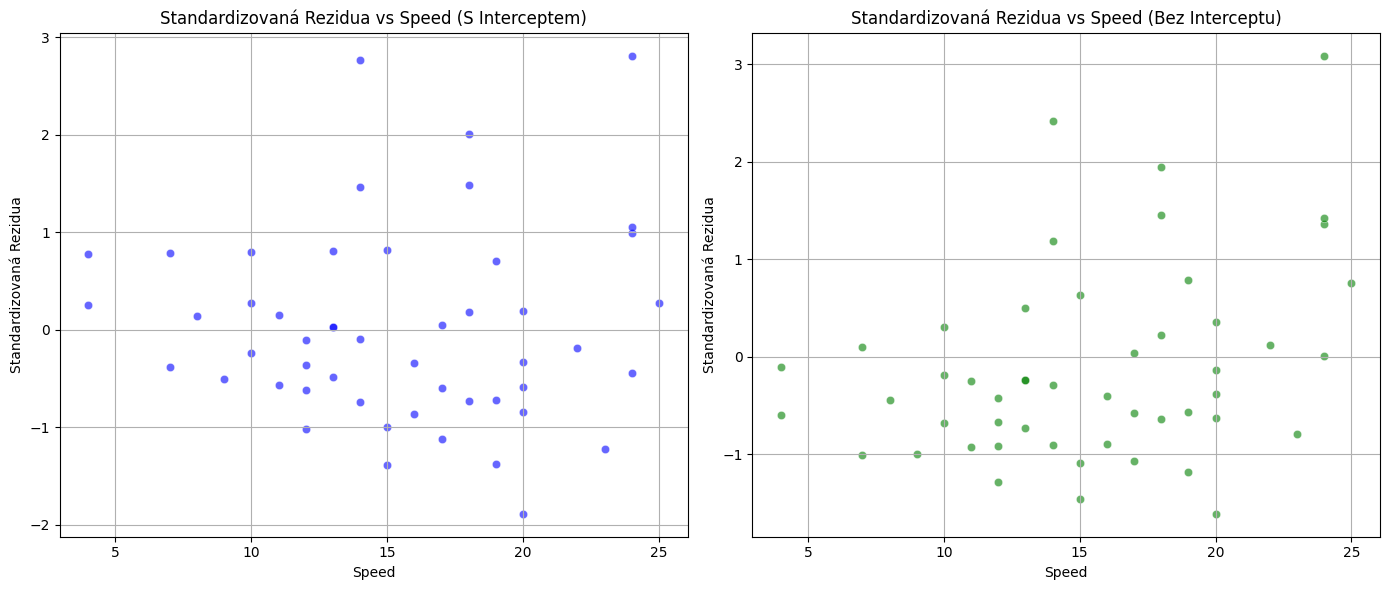

In [ ]:
# Rezidua pro oba modely
residuals_with = y - y_hat_with
residuals_without = y - y_hat_without

# 3. Výpočet Standardizovaných Reziduí

# Funkce pro výpočet standardizovaných reziduí
def calculate_standardized_residuals(residuals, model):
    # Výpočet standardní odchylky reziduí
    sigma = np.sqrt(model.scale)
    # Standardizovaná rezidua
    std_residuals = residuals / sigma
    return std_residuals

# Standardizovaná rezidua pro model s interceptem
std_residuals_with = calculate_standardized_residuals(residuals_with, model_with_intercept)

# Standardizovaná rezidua pro model bez interceptu
std_residuals_without = calculate_standardized_residuals(residuals_without, model_without_intercept)

# 4. Vykreslení Grafů Standardizovaných Reziduí vs Speed

plt.figure(figsize=(14, 6))

# Graf pro Model s Interceptem
plt.subplot(1, 2, 1)
sns.scatterplot(x=x, y=std_residuals_with, color='blue', alpha=0.6)
plt.title('Standardizovaná Rezidua vs Speed (S Interceptem)')
plt.xlabel('Speed')
plt.ylabel('Standardizovaná Rezidua')
plt.grid(True)

# Graf pro Model bez Interceptu
plt.subplot(1, 2, 2)
sns.scatterplot(x=x, y=std_residuals_without, color='green', alpha=0.6)
plt.title('Standardizovaná Rezidua vs Speed (Bez Interceptu)')
plt.xlabel('Speed')
plt.ylabel('Standardizovaná Rezidua')
plt.grid(True)

plt.tight_layout()
plt.show()



**OUTLIER**



WITHOUT OUTLIER------------------------------------------------
Model WITH intercept:
Estimate for beta1 (slope): 3.932408759124088
Estimate for beta0 (intercept): -17.57909489051096
Model WITHOUT intercept:
Estimate for beta1 (slope): 2.909132143937103
WITH OUTLIER------------------------------------------------
Model WITH intercept:
Estimate for beta1 (slope): 2.4258328095537407
Estimate for beta0 (intercept): 9.24324324324321
Model WITHOUT intercept:
Estimate for beta1 (slope): 2.9660223497432803


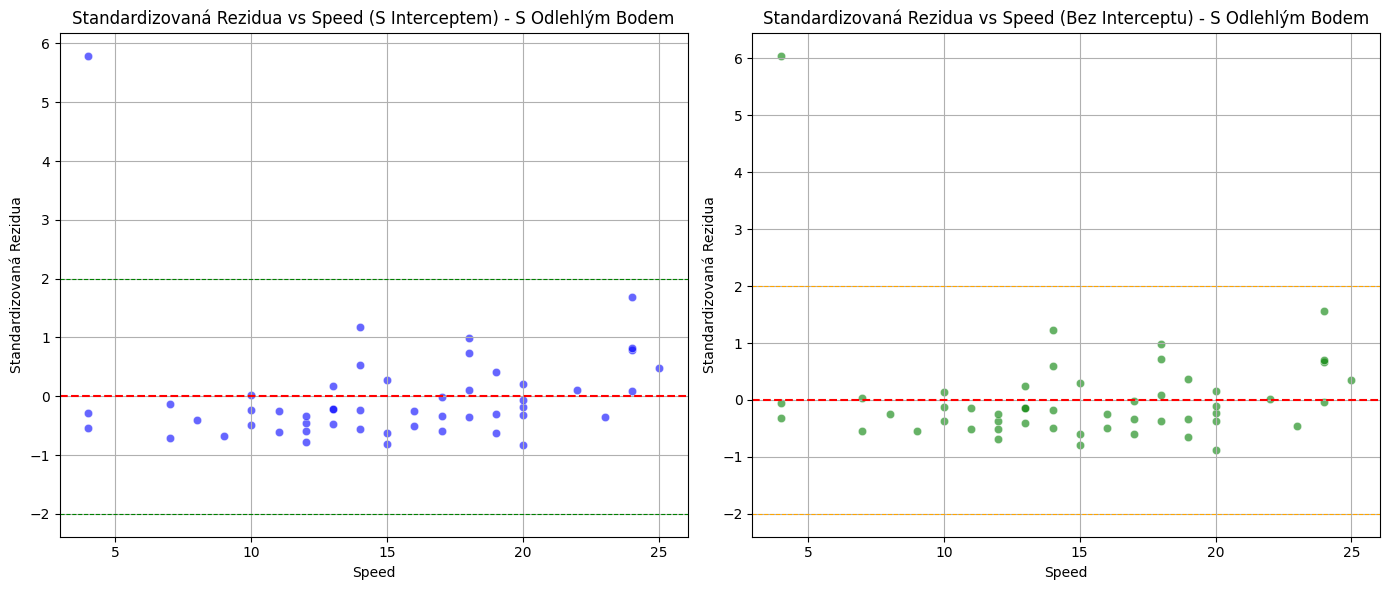

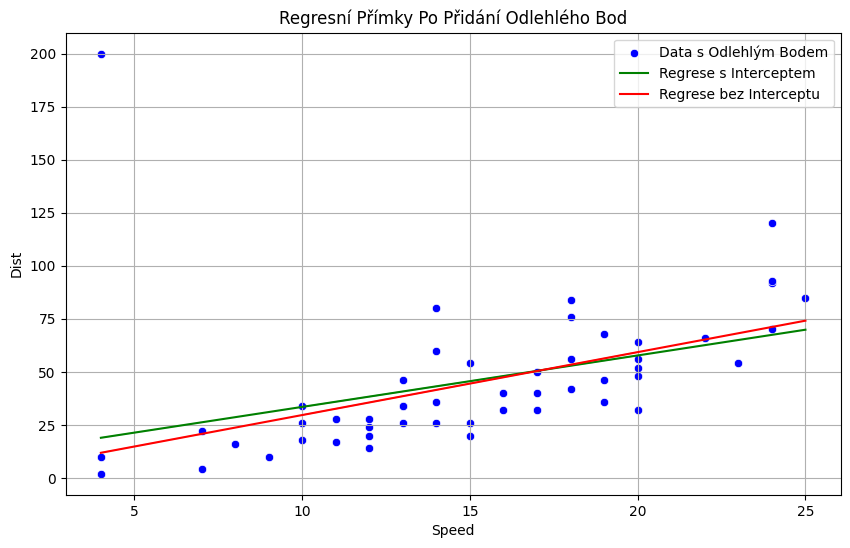

Model s Interceptem - S Odlehlým Bodem Summary:
                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     9.014
Date:                Wed, 09 Oct 2024   Prob (F-statistic):            0.00421
Time:                        09:15:38   Log-Likelihood:                -246.91
No. Observations:                  51   AIC:                             497.8
Df Residuals:                      49   BIC:                             501.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

In [ ]:


# Vytvoření kopie původního datasetu
cars_df_outlier = cars_df.copy()

# Zavedení odlehlého bodu
outlier = pd.DataFrame({'speed': [4], 'dist': [200]})
cars_df_outlier = pd.concat([cars_df_outlier, outlier], ignore_index=True)

# Aktualizace proměnných
x_outlier = cars_df_outlier['speed']
y_outlier = cars_df_outlier['dist']

# 6. Vytvoření Nových Modelů s Odlehlým Bodem

# Model s interceptem
X_with_intercept_outlier = sm.add_constant(x_outlier)
model_with_intercept_outlier = sm.OLS(y_outlier, X_with_intercept_outlier).fit()

# Model bez interceptu
model_without_intercept_outlier = sm.OLS(y_outlier, x_outlier).fit()

# 7. Výpočet Predikovaných Hodnot a Reziduí pro Nové Modely

# Predikované hodnoty pro model s interceptem
beta0_with_outlier = model_with_intercept_outlier.params['const']
beta1_with_outlier = model_with_intercept_outlier.params['speed']
y_hat_with_outlier = beta0_with_outlier + beta1_with_outlier * x_outlier

# Predikované hodnoty pro model bez interceptu
beta1_without_outlier = model_without_intercept_outlier.params['speed']
y_hat_without_outlier = beta1_without_outlier * x_outlier  # No intercept

# Results
print("WITHOUT OUTLIER------------------------------------------------")
print("Model WITH intercept:")
print(f"Estimate for beta1 (slope): {beta1_hat}")
print(f"Estimate for beta0 (intercept): {beta0_hat}")
print("Model WITHOUT intercept:")
print(f"Estimate for beta1 (slope): {beta1_hat_no_intercept}")
print("WITH OUTLIER------------------------------------------------")
print("Model WITH intercept:")
print(f"Estimate for beta1 (slope): {beta1_with_outlier}")
print(f"Estimate for beta0 (intercept): {beta0_with_outlier}")
print("Model WITHOUT intercept:")
print(f"Estimate for beta1 (slope): {beta1_without_outlier}")
# Odhad pro beta1 bez interceptu
beta1_hat_no_intercept = np.sum(x * y) / np.sum(x ** 2)

# Predikované hodnoty pro model bez interceptu
y_hat_no_intercept = beta1_hat_no_intercept * x

# Výpočet rozptynu odhadu beta1 bez interceptu
# Pro model bez interceptu je rozptyn:
var_beta1_no_intercept = sigma2_hat / np.sum(x ** 2)

# Rezidua pro oba modely
residuals_with_outlier = y_outlier - y_hat_with_outlier
residuals_without_outlier = y_outlier - y_hat_without_outlier

# 8. Výpočet Standardizovaných Reziduí pro Nové Modely

# Standardizovaná rezidua pro model s interceptem
std_residuals_with_outlier = calculate_standardized_residuals(residuals_with_outlier, model_with_intercept_outlier)

# Standardizovaná rezidua pro model bez interceptu
std_residuals_without_outlier = calculate_standardized_residuals(residuals_without_outlier, model_without_intercept_outlier)

# 9. Vykreslení Grafů Standardizovaných Reziduí vs Speed po Přidání Odlehlého Bod

plt.figure(figsize=(14, 6))

# Graf pro Model s Interceptem po přidání odlehlého bodu
plt.subplot(1, 2, 1)
sns.scatterplot(x=x_outlier, y=std_residuals_with_outlier, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=2, color='green', linestyle='--', linewidth=0.8)
plt.axhline(y=-2, color='green', linestyle='--', linewidth=0.8)
plt.title('Standardizovaná Rezidua vs Speed (S Interceptem) - S Odlehlým Bodem')
plt.xlabel('Speed')
plt.ylabel('Standardizovaná Rezidua')
plt.grid(True)

# Graf pro Model bez Interceptu po přidání odlehlého bodu
plt.subplot(1, 2, 2)
sns.scatterplot(x=x_outlier, y=std_residuals_without_outlier, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=2, color='orange', linestyle='--', linewidth=0.8)
plt.axhline(y=-2, color='orange', linestyle='--', linewidth=0.8)
plt.title('Standardizovaná Rezidua vs Speed (Bez Interceptu) - S Odlehlým Bodem')
plt.xlabel('Speed')
plt.ylabel('Standardizovaná Rezidua')
plt.grid(True)

plt.tight_layout()
plt.show()

# 10. Vizualizace Regresních Přímek Po Přidání Odlehlého Bodu

plt.figure(figsize=(10, 6))

# Scatter plot nových dat s odlehlým bodem
sns.scatterplot(x=x_outlier, y=y_outlier, color='blue', label='Data s Odlehlým Bodem')

# Regresní přímky
# Model s interceptem
sns.lineplot(x=x_outlier, y=y_hat_with_outlier, color='green', label='Regrese s Interceptem')

# Model bez interceptu
sns.lineplot(x=x_outlier, y=y_hat_without_outlier, color='red', label='Regrese bez Interceptu')

plt.title('Regresní Přímky Po Přidání Odlehlého Bod')
plt.xlabel('Speed')
plt.ylabel('Dist')
plt.legend()
plt.grid(True)
plt.show()


**ZLEPŠENÍ**

                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     100.3
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           2.41e-13
Time:                        09:20:24   Log-Likelihood:                -29.592
No. Observations:                  50   AIC:                             63.18
Df Residuals:                      48   BIC:                             67.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6761      0.196      8.546      0.0

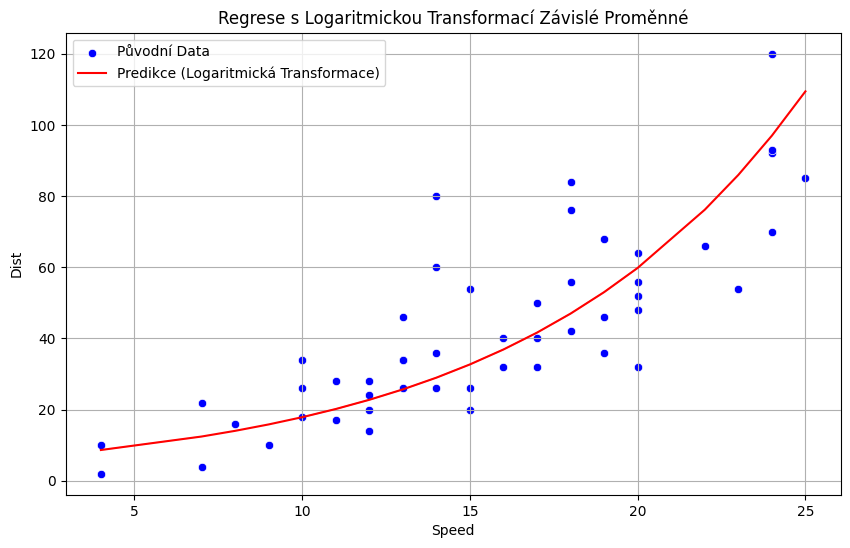

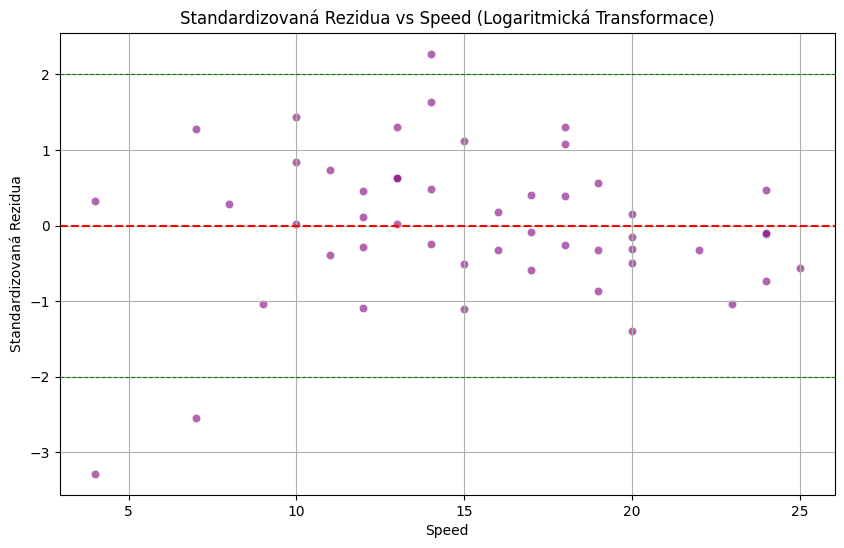

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Data
x = cars_df['speed']
y = cars_df['dist']

# 1. Logaritmická transformace závislé proměnné (dist)
log_y = np.log(y)

# 2. Vytvoření Modelu s logaritmicky transformovanou závislou proměnnou

# Model s interceptem
X_with_intercept = sm.add_constant(x)
model_log = sm.OLS(log_y, X_with_intercept).fit()

# 3. Výpis výsledků modelu
print(model_log.summary())

# 4. Predikce pro model s logaritmickou transformací
y_hat_log = model_log.predict(X_with_intercept)

# 5. Transformace predikovaných hodnot zpět do původní škály
y_hat_exp = np.exp(y_hat_log)

# 6. Výpočet reziduí a standardizovaných reziduí

# Výpočet reziduí pro logaritmicky transformovanou závislou proměnnou
residuals_log = log_y - y_hat_log

# Výpočet standardizovaných reziduí
def calculate_standardized_residuals(residuals, model):
    sigma = np.sqrt(model.scale)  # Odhad standardní odchylky reziduí
    std_residuals = residuals / sigma
    return std_residuals

std_residuals_log = calculate_standardized_residuals(residuals_log, model_log)

# 7. Vykreslení původních dat a predikovaných hodnot
plt.figure(figsize=(10, 6))

# Scatter plot původních dat
sns.scatterplot(x=x, y=y, color='blue', label='Původní Data')

# Vykreslení predikcí z modelu po transformaci
sns.lineplot(x=x, y=y_hat_exp, color='red', label='Predikce (Logaritmická Transformace)')

plt.title('Regrese s Logaritmickou Transformací Závislé Proměnné')
plt.xlabel('Speed')
plt.ylabel('Dist')
plt.legend()
plt.grid(True)
plt.show()

# 8. Vykreslení grafu standardizovaných reziduí

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=std_residuals_log, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=2, color='green', linestyle='--', linewidth=0.8)
plt.axhline(y=-2, color='green', linestyle='--', linewidth=0.8)
plt.title('Standardizovaná Rezidua vs Speed (Logaritmická Transformace)')
plt.xlabel('Speed')
plt.ylabel('Standardizovaná Rezidua')
plt.grid(True)
plt.show()

